<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

## Analisis comparativo de la demanda laboral de especiliastas en Analitica de datos  y el perfil profesional propuesto de la Universidad Konrad Lorenz

#### Daniel Alejandro Cárdenas Niño
#### Guillermo Cardona

### Objetivo Principal:
La siguiente propuesta busca establecer la relación existente entre la pertinencia curricular del programa especialización en Anlitica de datos, de la Universidad Konrad Lorenz y los perfiles profesionales que esta demandando la ciudad de Bogotá D.C. 


### Recolección de datos:
Los siguientes datos se recolectaron utilizando la herramienta de Web Scrapping con la libreria Beautiful Soup, en la pagina de <a href="https://www.computrabajo.com.co/">computrabajo</a> y el perfil del Egresado Especialización en Analítica Estratégica de Datos de la Universidad Konrad Lorenz el cual se encuentra en su pagina Web. 
<a href="http://www.konradlorenz.edu.co/es/aspirantes/posgrados/especializacion-analitica-estrategica-datos/perfil-del-egresado.html">Se puede visualizar aquí.</a>

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

############ Requests
import bs4 as bs
import urllib.request

import re
from unicodedata import normalize

import requests
import argparse

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

import gensim
import platform
import gensim.models.word2vec as w2v

import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

# ! pip install plotly
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


C:\Users\Memo\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
def paginaPython(datUrl, trabajoguion, ubicacionguion, trabajoporc):
  # Descargar la página web en Python  
    request = urllib.request.Request(datUrl, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urllib.request.urlopen(request)
    source = webpage.read()
    webpage.close()
    soup = bs.BeautifulSoup(source, 'html.parser')
    return soup, trabajoguion, ubicacionguion, trabajoporc;

def paginaPythonDatoUrl(datUrl):
  # Descargar la página web en Python  
    request = urllib.request.Request(datUrl, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urllib.request.urlopen(request)
    source = webpage.read()
    webpage.close()
    soup = bs.BeautifulSoup(source, 'html.parser')
    return soup;

def convertirPalabraGuionURL(datURL):
    a = datURL.replace(" ", "-")
    return a

def convertirPalabraVaciaBusquedaURL(datURL):
    a = datURL.replace(" ", "%20")
    return a


def convertirNum(num):
    numero= num.replace(".", "")
    return int(numero)

def scrape_jobs(ubicacion=None, trabajo=None):
    if trabajo:
        trabajoguion = convertirPalabraGuionURL(trabajo)
        
    if ubicacion:
        if(ubicacion == "bogota"):
            ubicacion = ubicacion+"-dc"
        elif(ubicacion == "Bogota"):
            ubicacion = ubicacion+"-dc"
        elif(ubicacion == "Bogotá"):
            ubicacion = ubicacion+"-dc" 
        elif(ubicacion == "bogotá"):
            ubicacion = ubicacion+"-dc"
        else:
            ubicacion=ubicacion
        ubicacionguion = convertirPalabraGuionURL(ubicacion)
        
    if trabajo:
        trabajoporciento = convertirPalabraVaciaBusquedaURL(trabajo)
        
    if ubicacion and trabajo:
        URL = f"https://www.computrabajo.com.co/trabajo-de-{trabajoguion}-en-{ubicacionguion}?q={trabajoporciento}"
        #linkPrimariosPaginacion(f"https://www.computrabajo.com.co/trabajo-de-{trabajoguion}-en-{ubicacionguion}?p=")
    elif ubicacion and not trabajo:
        print(f"Por favor especifique el trabajo que desea buscar, gracias")
        return
    elif trabajo and not ubicacion:
        URL = f"https://www.computrabajo.com.co/trabajo-de-{trabajoguion}?q={trabajoporciento}"
    elif not trabajo and not ubicacion:
        print(f"Trabajo y Ubicacion deben tener datos, gracias")
        return
    else:
        print(f"Datos errones, intentelo de nuevo, gracias")
        return

    return paginaPython(URL, trabajoguion, ubicacionguion, trabajoporciento)


#genera todos los link internos de la busqueda es cada link primario los que contienen 20 por pagina
def generarTodosLinkIni(entero, residuos, urlpagina, trabajoporc, listagenul, listadescrip):
    turlprimarias = []
    if entero > 0:
        count=0
        for contad in range(0,entero):
            contad =  str(contad+1)
            urlcompleta = urlpagina + contad + "&q=" + trabajoporc
            turlprimarias.append(str(urlcompleta))
            
        if residuos > 0:  
            contad =  int(contad)+1            
            urlcompleta = urlpagina + str(contad) + "&q=" + trabajoporc
            turlprimarias.append(str(urlcompleta))
    else:
        contad =  "1"
        urlcompleta = urlpagina + contad  + "&q=" + trabajoporc
        turlprimarias.append(str(urlcompleta))
    
    linkPaginacion(turlprimarias, listagenurl, listadescrip)
        

#traer el titulo y el link de todas las vacantes
def buscardatpagina(bsoup, listagenurl, listadescrip):
    todapagpaginascont=[]
    
    #link normales
    link_elems = bsoup.find_all('div', class_='bRS bClick')
    #return link_elems
    for job_elem in link_elems:
        camp_div = job_elem.find_all('div', class_='iO')
        title_link = job_elem.find('a', class_="js-o-link")
        descripcion_elem = job_elem.find('p')
        #company_elem = job_elem.find('a', class_='it-blank')["title"]
        # location_elem = job_elem.find('a', title_='Empleos')

        if None in (title_link, descripcion_elem):
            continue
            # print(job_elem.prettify())  # to inspect the 'None' element

        #print(f"Titulo {title_link.text.strip()} - https://www.computrabajo.com.co{title_link['href']}")
        todapagpaginascont.append("https://www.computrabajo.com.co"+title_link["href"])
        
    link_elems = bsoup.find_all('div', class_='bRS bClick ')
    #return link_elems
    for job_elem in link_elems:
        camp_div = job_elem.find_all('div', class_='iO')
        title_link = job_elem.find('a', class_="js-o-link")
        descripcion_elem = job_elem.find('p')
        #company_elem = job_elem.find('a', class_='it-blank')["title"]
        # location_elem = job_elem.find('a', title_='Empleos')

        if None in (title_link, descripcion_elem):
            continue
            # print(job_elem.prettify())  # to inspect the 'None' element

        #print(f"Titulo {title_link.text.strip()} - https://www.computrabajo.com.co{title_link['href']}")
        todapagpaginascont.append("https://www.computrabajo.com.co"+title_link["href"])
        
    #links resaltados    
    link_esp = bsoup.find_all('div', class_='bRS bClick oD')
    for job_elem in link_esp:
        camp_div = job_elem.find_all('div', class_='iO')
        title_link = job_elem.find('a', class_="js-o-link")
        descripcion_elem = job_elem.find('p')

        if None in (title_link, descripcion_elem):
            continue
        todapagpaginascont.append("https://www.computrabajo.com.co"+title_link["href"])
        
    #links importancia alta o urgentes resaltados    
    link_esp = bsoup.find_all('div', class_='bRS bClick oD oU')
    for job_elem in link_esp:
        camp_div = job_elem.find_all('div', class_='iO')
        title_link = job_elem.find('a', class_="js-o-link")
        descripcion_elem = job_elem.find('p')

        if None in (title_link, descripcion_elem):
            continue
        
        todapagpaginascont.append("https://www.computrabajo.com.co"+title_link["href"])
        
    #links importancia alta o urgentes    
    link_esp = bsoup.find_all('div', class_='bRS bClick  oU')
    for job_elem in link_esp:
        camp_div = job_elem.find_all('div', class_='iO')
        camp_divs = job_elem.find('h2', class_='tO')
        title_link = job_elem.find('a', class_="js-o-link")
        descripcion_elem = job_elem.find('p')

        if None in (camp_divs, title_link, descripcion_elem):
            continue
        
        todapagpaginascont.append("https://www.computrabajo.com.co"+title_link["href"])
    
    
    paginaEmpleo(todapagpaginascont, listagenurl, listadescrip)  

    
#reecorre los link de la paginacion y le hace scrapping
def paginaEmpleo(linkpagprincipal, lista, listadescrip):
    cont = 1
    for i in linkpagprincipal:
        pagpaginacion = paginaPythonDatoUrl(i)
        #lista link
        lista.append(i)
        buscardatpaginaVacante(pagpaginacion, listadescrip)
        
#reecorre los link de las paginares
def linkPaginacion(linkpagprincipal, listagenurl, listadescrip):
    solobs = []
    for i in linkpagprincipal:
        pagpaginacion = paginaPythonDatoUrl(i)
        buscardatpagina(pagpaginacion, listagenurl, listadescrip)
            
#realiza  conteo de paginas y retorna, la parte entera, residuo y url primaria de paginacion
def linkPrimariosPaginacion(cantPaginas, urlpaginas, trabajoporc, listagenurl, listadescrip):
    intcant = int(cantPaginas)
    if intcant > 0:
        numfinalpag = intcant/20
        split_num = str(numfinalpag).split('.')
        int_part = int(split_num[0])
        decimal_part = int(split_num[1])
        
        if int_part > 1000:
            int_part = 50
            decimal_part = 0
            return generarTodosLinkIni(int_part, decimal_part, urlpaginas, trabajoporc, listagenurl, listadescrip)
        else:
            return generarTodosLinkIni(int_part, decimal_part, urlpaginas, trabajoporc, listagenurl, listadescrip)
    else:
        return print("Busqueda sin resultados")

def validarEntero(entero):
    if type(entero) not in (int, float):
        return 0
    else:
        return entero
    
def numeroPaginas(resultadopagprinc):
    link_elems = resultadopagprinc.find_all('div', class_='pg_grid')
    #return link_elems
    for job_elem in link_elems:
        camp_div = job_elem.find('span')
        cantidad = camp_div.contents[3]
        numero  = cantidad.text.strip()
        digito = validarEntero(int(numero))
        #digito = convertirNum(numero)
        return digito

    
def buscardatpaginaVacante(bsoup, listadescrip):
    
    desc_div = bsoup.find_all('div', class_='bgBlueMbl w_100 fl mt20 mt0_r')
    cont = 0
    for divs in desc_div:       
        desc_articulo = divs.find('article', class_='cm-8 fl p0 w100_r')  
        desc_section = divs.find('section', class_='boxWhite fl w_100 detail_of mb20 bWord')  
        descripcionul = divs.find('ul', class_="p0 m0") 
        
        datdescrip = descripcionul.find_all("li")[1]  
        listadescrip.append(datdescrip.text)
    return listadescrip


In [3]:
listagenurl=[]
listadescrip = []
#primer parametro ubicacion, segundo el trabajo a buscar
pagina = scrape_jobs("Bogota","Analista de datos")
data = pd.DataFrame ()
#pd.set_option("max_colwidth", None)
#cantidad de paginas
conteopag = numeroPaginas(pagina[0])
if conteopag == None:
    print("No hay resultados de busqueda")
else:
    linkPrimariosPaginacion(conteopag, f"https://www.computrabajo.com.co/trabajo-de-{pagina[1]}-en-{pagina[2]}?p=", pagina[3], listagenurl, listadescrip)
    
data["link"] = listagenurl
data["descripcion"] = listadescrip


In [4]:
data.to_csv(r'C:\ArchivoNLP.csv', encoding='utf-8-sig')

### Desafios 

1. La cantidad de opciones en la que se puede escribir una ciudad. Ejemplo: Bogota, bogotá, Bogotá, BOGOTA DC.
2. Para un empleo se pueden tener mas de una hoja de vacantes en computrabajo. "Cada hoja contiene 20 vacantes".
3. Si el empleo que se busca no trae resultado.
4. Al recorrer el codigo HTML sobre la pagina de computrabajo, el scraping devuelve multiples etiquetas para las vacantes.
5. Al tener varios ciclos, se retornan varias instancias de las listas lo cual nos afectó para crear el DataFrame
6. Desventajas: Como no tenemos etiquetas, vamos a utilizar K-means para ver la similitud de el perfil vs la vacante

In [6]:
df = pd.read_csv("C:/ArchivoNLP.csv")
df

,Unnamed: 0,link,descripcion
0,0,https://www.computrabajo.com.co/ofertas-de-tra...,Importante empresa del sector de consultoría ...
1,1,https://www.computrabajo.com.co/ofertas-de-tra...,Importante empresa del sector de consultoría ...
2,2,https://www.computrabajo.com.co/ofertas-de-tra...,"Reconocida empresa Contac Center, se encuentra..."
3,3,https://www.computrabajo.com.co/ofertas-de-tra...,"Reconocida empresa Contac Center, se encuentra..."
4,4,https://www.computrabajo.com.co/ofertas-de-tra...,Importante compañía requiere Profesionales en ...
...,...,...,...
86,86,https://www.computrabajo.com.co/ofertas-de-tra...,Cargo: Big data estratégicoSalario: $2.500.000...
87,87,https://www.computrabajo.com.co/ofertas-de-tra...,Cargo: Big data estratégicoSalario: $2.500.000...
88,88,https://www.computrabajo.com.co/ofertas-de-tra...,Cargo: Big data estratégicoSalario: $2.500.000...
89,89,https://www.computrabajo.com.co/ofertas-de-tra...,Importante empresa multinacional ubicada al no...


In [7]:
stopwords_sp = stopwords.words('spanish')

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(df.descripcion.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

In [8]:
ks = []
k_inertias = []

for k in range(1,30):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

C:\Users\Memo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



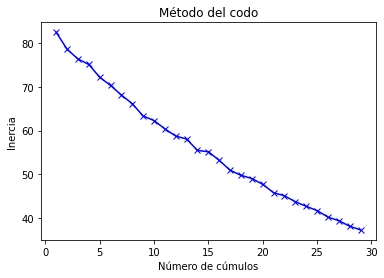

In [9]:
# list(zip(ks,k_inertias))

plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

In [10]:
k = 5
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=5)

In [11]:
df['cluster'] = model.labels_
df

,Unnamed: 0,link,descripcion,cluster
0,0,https://www.computrabajo.com.co/ofertas-de-tra...,Importante empresa del sector de consultoría ...,1
1,1,https://www.computrabajo.com.co/ofertas-de-tra...,Importante empresa del sector de consultoría ...,1
2,2,https://www.computrabajo.com.co/ofertas-de-tra...,"Reconocida empresa Contac Center, se encuentra...",1
3,3,https://www.computrabajo.com.co/ofertas-de-tra...,"Reconocida empresa Contac Center, se encuentra...",1
4,4,https://www.computrabajo.com.co/ofertas-de-tra...,Importante compañía requiere Profesionales en ...,2
...,...,...,...,...
86,86,https://www.computrabajo.com.co/ofertas-de-tra...,Cargo: Big data estratégicoSalario: $2.500.000...,3
87,87,https://www.computrabajo.com.co/ofertas-de-tra...,Cargo: Big data estratégicoSalario: $2.500.000...,3
88,88,https://www.computrabajo.com.co/ofertas-de-tra...,Cargo: Big data estratégicoSalario: $2.500.000...,3
89,89,https://www.computrabajo.com.co/ofertas-de-tra...,Importante empresa multinacional ubicada al no...,1


In [12]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = df['cluster'].value_counts()
clust_cnt_pct = df['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in df.iloc[nbrs.kneighbors([centroids[i]])[1][0]].descripcion.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 15 registros (16.48% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
base datos administración meses candidatos inscripción inicialmente avanzado ciudad administrador bogotá experiencia analista proceso excel teletrabajo selección motores farma requerimos 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Nos encontramos en búsqueda de un analista de datos (Excel avanzado) Funciones- Apoyo al proceso de inscripción y selección de candidatos, seguimiento a procesos y administración de la base de datos. Perfil- Profesional en ingenieria, administración o similares- Experiencia de 6 meses como administrador de base de datos- Inglés B1 Condiciones- Horario de Lunes a Viernes de 8:00 am a 6:00 pm- Salario $2'000.000- Inicialmente Teletrabajo

 *** Importante empresa del sector se encuentra en la búsqueda de analista de datos (Excel avanzado) Funciones-Apoyo al proceso de inscripción y selección de candidatos - Seguimiento a procesos - Administración de la base de datos. Perfil-Profesional 

In [13]:
clusters = {0: '1',
            1: '2',
            2: '3',
            3: '4',
            4: '5'}     

df['nombres_clusters'] = df['cluster'].apply(lambda val: clusters[val])
df.sample(5)

,Unnamed: 0,link,descripcion,cluster,nombres_clusters
79,79,https://www.computrabajo.com.co/ofertas-de-tra...,Servicios Médicos Vital Health Requiere de man...,3,4
7,7,https://www.computrabajo.com.co/ofertas-de-tra...,Entidad financiera requiere profesional en Ing...,1,2
48,48,https://www.computrabajo.com.co/ofertas-de-tra...,Nos encontramos en la búsqueda de un ANALISTA ...,1,2
81,81,https://www.computrabajo.com.co/ofertas-de-tra...,Empresa de telecomunicaciones ubicada en Tober...,1,2
2,2,https://www.computrabajo.com.co/ofertas-de-tra...,"Reconocida empresa Contac Center, se encuentra...",1,2


In [14]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = df.nombres_clusters.values
result['texto'] = df.descripcion.apply(lambda val: val[:140])

colorsIdx = {'1': 'orange',
             '2': 'red',
             '3': 'blue',
             '4': 'green',
             '5': 'black'}
            

result['colores'] = result['cluster'].map(colorsIdx)


result.head()

,X,Y,cluster,texto,colores
0,-0.000290,0.034309,2,Importante empresa del sector de consultoría ...,red
1,-0.000290,0.034309,2,Importante empresa del sector de consultoría ...,red
2,0.074531,0.023593,2,"Reconocida empresa Contac Center, se encuentra...",red
3,0.074531,0.023593,2,"Reconocida empresa Contac Center, se encuentra...",red
4,-0.042766,-0.073090,3,Importante compañía requiere Profesionales en ...,blue


In [16]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [17]:
nuevo = ["Estructurar proyectos de analítica de datos que permitan satisfacer las necesidades de información de las organizaciones.", "Implementar modelos analíticos y predictivos de un alcance básico que respondan a las necesidades de información de las organizaciones", "Sintetizar de forma eficiente los resultados obtenidos a partir de la información y del desarrollo de los análisis obtenidos al aplicar las metodologías estadísticas y de machine learning que estén a su alcance, como también comprender los resultantes de las técnicas analíticas y predictivas más avanzadas", "Apoyar la puesta en producción de las soluciones obtenidas a partir de un proyecto de analítica", "Tomar decisiones estratégicas con base en la información analizada", "Comunicar a las audiencias de diferentes áreas los hallazgos encontrados a partir del desarrollo del proyecto de analítica de datos"]

In [18]:
nuevo_trans = tfidf_vect.transform(nuevo)
[clusters[i] for i in model.predict(nuevo_trans)]

['3', '2', '2', '2', '2', '2']